In this jupyter notebook, the construction of a binary output non-linear SVM classifier is carried out to predict the waking and sleeping state of different subjects.

In [1]:
import os
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
Train_bin= pd.read_csv('Train_binary.csv')
Test_bin= pd.read_csv('Test_binary.csv')

In [3]:
X_train_bin=Train_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1) 
y_train_bin=Train_bin['Binary label']

X_test_bin=Test_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1)
y_test_bin=Test_bin['Binary label']

In [4]:
#Creation of the model and selection of free parameters
clf = SVC(kernel='rbf', C=10, decision_function_shape='ovr' ) 
modelo_base=clf.fit(X_train_bin,y_train_bin)

In [5]:
clf

SVC(C=10)

In [6]:
#Cross-validated parameter search
Cs =[0.1,1,10,100,1000] 
gamma = range(1,10,1) 
param_grid = {'C': Cs} 
param_grid = {'gamma': gamma} 
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=5,n_jobs=-1)
svc_grid.fit(X_train_bin, y_train_bin)
best_param=svc_grid.best_params_

In [7]:
#Classifier with the best parameters
svc_clf=svc_grid.best_estimator_

In [8]:
Cs

[0.1, 1, 10, 100, 1000]

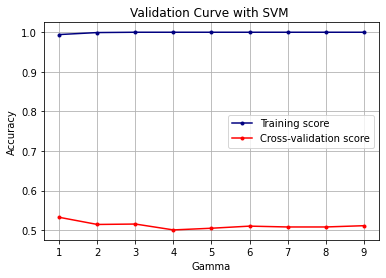

In [9]:
train_scores, test_scores = validation_curve(clf, X_train_bin, y_train_bin, param_name="gamma", param_range=gamma,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with SVM ")
plt.xlabel('Gamma')
plt.ylabel("Accuracy")

plt.plot(gamma, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(gamma, test_scores_mean, label="Cross-validation score",color="red",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/Gamma parameter.png' )
plt.show()

In [19]:
print("The optimal value is:",best_param)

The optimal value is: {'gamma': 1}


In [11]:
print("Base model hit rate:",modelo_base.score(X_test_bin,y_test_bin))
print("Model hit rate with the search for parameters:",svc_clf.score(X_test_bin,y_test_bin))
print('Improved: {:0.2f}%.'.format( 100 * (svc_clf.score(X_test_bin,y_test_bin) - modelo_base.score(X_test_bin,y_test_bin)) / modelo_base.score(X_test_bin,y_test_bin)))

Base model hit rate: 0.6108949416342413
Model hit rate with the search for parameters: 0.5214007782101168
Improved: -14.65%.


In [20]:
predict = svc_clf.predict(X_test_bin)

acc_test= svc_clf.score(X_test_bin, y_test_bin).round(4)
acc_train= svc_clf.score(X_train_bin, y_train_bin).round(4)
print('The accuracy for the SVM model in the TEST set is:',acc_test,'%\n')
print('The accuracy for the SVM model in the TRAIN set is:',acc_train,'%\n')

print("=============== Classification Report ================")
print(classification_report(y_test_bin, predict))

The accuracy for the SVM model in the TEST set is: 0.5214 %

The accuracy for the SVM model in the TRAIN set is: 0.9915 %

=============== Classification Report ================
              precision    recall  f1-score   support

         0.0       0.52      0.64      0.57       129
         1.0       0.53      0.40      0.45       128

    accuracy                           0.52       257
   macro avg       0.52      0.52      0.51       257
weighted avg       0.52      0.52      0.51       257



In [21]:
matriz_confusion=pd.crosstab (y_test_bin,predict, rownames=['Predicted class'], colnames=['Classification result'])
matriz_confusion

Classification result,0.0,1.0
Predicted class,,
0.0,83,46
1.0,77,51


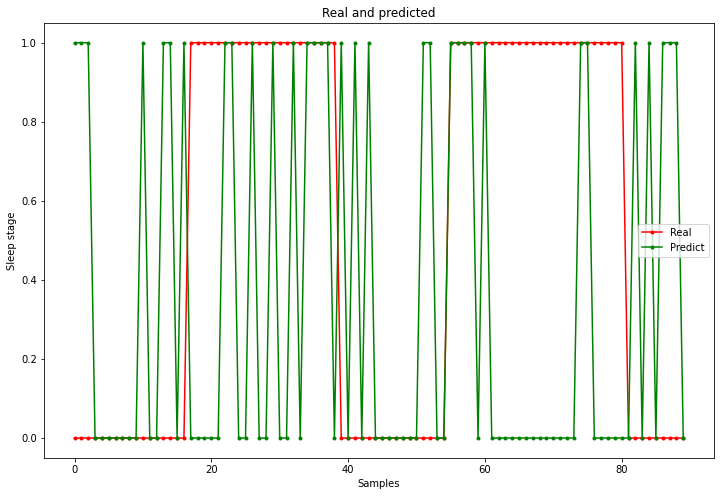

In [22]:
plt.figure(figsize=(12,8))
plt.plot(y_test_bin[0:90],color='red', marker='.',label='Real')
plt.plot(predict[0:90],color='green', marker='.',label='Predict')

plt.title('Real and predicted')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()
plt.savefig('Image/NLB_SVM.png')

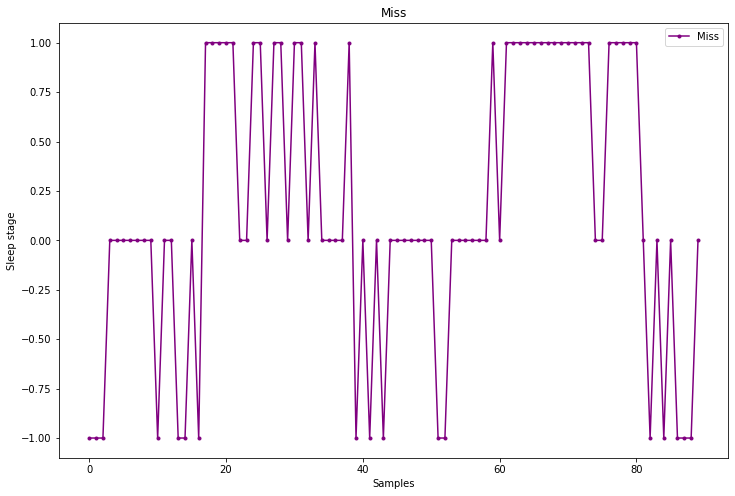

In [15]:
miss= y_test_bin - predict
plt.figure(figsize=(12,8))
plt.plot(miss[0:90],color='purple', marker='.',label='Miss')

plt.title('Miss')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()